In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/Python DataScience/KaggleSelfChallenges/Titanic Dataset/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X_train= data.drop(["PassengerId","Name","Ticket","Cabin",],axis =1)
y_train = pd.DataFrame(X_train["Survived"])

In [7]:
from pycaret.classification import *
exp2 = setup(data = X_train, target ='Survived',categorical_imputation='mode',normalize=True,normalize_method='minmax',remove_outliers=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2239
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 8)"
4,Missing Values,True
5,Numeric Features,2
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
X_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
exp2

(          Age      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  SibSp_0  \
 0    0.271174  0.014151       0.0       0.0       1.0         0.0      0.0   
 1    0.472229  0.139136       1.0       0.0       0.0         1.0      0.0   
 2    0.321438  0.015469       0.0       0.0       1.0         1.0      1.0   
 3    0.434531  0.103644       1.0       0.0       0.0         1.0      0.0   
 4    0.434531  0.015713       0.0       0.0       1.0         0.0      1.0   
 ..        ...       ...       ...       ...       ...         ...      ...   
 886  0.334004  0.025374       0.0       1.0       0.0         0.0      1.0   
 887  0.233476  0.058556       1.0       0.0       0.0         1.0      1.0   
 888  0.367921  0.045771       0.0       0.0       1.0         1.0      0.0   
 889  0.321438  0.058556       1.0       0.0       0.0         0.0      1.0   
 890  0.396833  0.015127       0.0       0.0       1.0         0.0      1.0   
 
      SibSp_1  SibSp_2  SibSp_3  SibSp_4  Parch_0 

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
test = pd.DataFrame(list(exp2))

,0
0,Age Fare Pclass_1 Pclass_2 P...
1,0 0 1 1 2 1 3 1 4 0 ...
2,Age Fare Pclass_1 Pclass_2 P...
3,Age Fare Pclass_1 Pclass_2 P...
4,506 1 316 1 690 1 875 1 518 1 ...


In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.834500,0.882700,0.720500,0.841400,0.770900,0.643600
1,CatBoost Classifier,0.834500,0.883600,0.750900,0.820000,0.778300,0.647700
2,Gradient Boosting Classifier,0.829500,0.884100,0.720700,0.826000,0.766600,0.633900
3,Light Gradient Boosting Machine,0.824400,0.876400,0.737900,0.807400,0.766600,0.626900
4,Linear Discriminant Analysis,0.820900,0.873100,0.728600,0.805000,0.761300,0.619000
5,Random Forest Classifier,0.817700,0.867900,0.738200,0.788700,0.759400,0.613600
6,Logistic Regression,0.817600,0.871800,0.741700,0.787900,0.761100,0.614100
7,Ridge Classifier,0.815800,0.000000,0.724300,0.795600,0.754300,0.608100
8,Extra Trees Classifier,0.812600,0.850900,0.751400,0.769200,0.754700,0.604600
9,Ada Boost Classifier,0.802400,0.858200,0.758700,0.746900,0.748300,0.586200


In [17]:
plot_model(estimator='confusion_matrix')

SystemExit: (Type Error): AUC plot not available for estimators with no predict_proba attribute.

In [18]:
evaluate_model(exp2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
tune_xb = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8500,0.9039,0.7917,0.8261,0.8085,0.6853
1,0.7667,0.7969,0.5833,0.7778,0.6667,0.4928
2,0.7797,0.8273,0.5652,0.8125,0.6667,0.5099
3,0.7966,0.8502,0.7391,0.7391,0.7391,0.5725
4,0.8136,0.8998,0.7826,0.7500,0.7660,0.6111
5,0.8305,0.8841,0.7391,0.8095,0.7727,0.6380
6,0.8475,0.8907,0.7391,0.8500,0.7907,0.6716
7,0.8475,0.8925,0.6957,0.8889,0.7805,0.6662
8,0.8983,0.9082,0.8696,0.8696,0.8696,0.7862
9,0.8305,0.8804,0.6957,0.8421,0.7619,0.6322


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

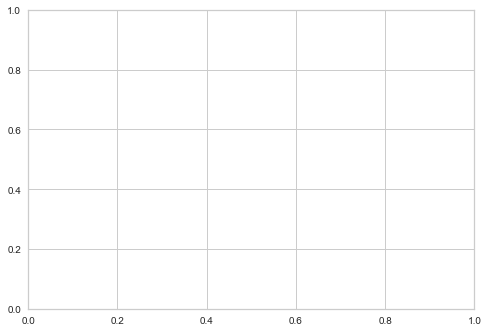

In [20]:
evaluate_model(tune_xb)

In [21]:
final_xg  = finalize_model(tune_xb)

In [22]:
print(final_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.14, max_delta_step=0, max_depth=80,
              min_child_weight=3, missing=None, n_estimators=900, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2239,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=0)


In [23]:
test = pd.read_csv("D:/Python DataScience/KaggleSelfChallenges/Titanic Dataset/test.csv")

In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
predictions = predict_model(final_xg,data=test)

In [27]:
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0287
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.0099
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0158
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.3884
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.2926


In [28]:
pred = pd.DataFrame(predictions['Label'])
sub_df = pd.read_csv("D:/Python DataScience/KaggleSelfChallenges/Titanic Dataset/gender_submission.csv")
datasets = pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission3.csv',index=False)

In [29]:
exp3 = setup(data = X_train, target ='Survived',categorical_imputation='mode',normalize=True,normalize_method='minmax',remove_outliers=True,transformation=True,feature_selection=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5517
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 8)"
4,Missing Values,True
5,Numeric Features,2
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [30]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.819200,0.862800,0.717400,0.814100,0.757400,0.614500
1,Light Gradient Boosting Machine,0.814200,0.857000,0.709200,0.803300,0.751100,0.603800
2,Logistic Regression,0.810800,0.861000,0.726400,0.784500,0.751500,0.599300
3,Extreme Gradient Boosting,0.809300,0.864600,0.700900,0.800100,0.743100,0.592800
4,Gradient Boosting Classifier,0.809200,0.864400,0.705100,0.795600,0.743500,0.592800
5,Ridge Classifier,0.805800,0.000000,0.700900,0.791700,0.740500,0.586200
6,Linear Discriminant Analysis,0.805800,0.857100,0.700900,0.791700,0.740500,0.586200
7,Ada Boost Classifier,0.804100,0.856700,0.739900,0.762400,0.748900,0.588500
8,Random Forest Classifier,0.789000,0.831600,0.683500,0.769300,0.720100,0.551600
9,SVM - Linear Kernel,0.775500,0.000000,0.717800,0.727100,0.713600,0.530000


In [31]:
evaluate_model(exp3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
tune_xb = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.8206,0.6667,0.8000,0.7273,0.5714
1,0.7167,0.8096,0.5833,0.6667,0.6222,0.3972
2,0.7458,0.8607,0.7917,0.6552,0.7170,0.4899
3,0.7966,0.8792,0.6250,0.8333,0.7143,0.5613
4,0.8983,0.9312,0.8261,0.9048,0.8636,0.7828
5,0.7458,0.7899,0.5217,0.7500,0.6154,0.4345
6,0.8305,0.8382,0.6957,0.8421,0.7619,0.6322
7,0.8305,0.8569,0.6522,0.8824,0.7500,0.6261
8,0.7627,0.9016,0.5217,0.8000,0.6316,0.4678
9,0.8305,0.8792,0.6957,0.8421,0.7619,0.6322


In [33]:
evaluate_model(tune_xb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
tune_cm = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8167,0.8275,0.6667,0.8421,0.7442,0.6043
1,0.8167,0.8270,0.7500,0.7826,0.7660,0.6154
2,0.7627,0.8690,0.7500,0.6923,0.7200,0.5147
3,0.8475,0.8857,0.7083,0.8947,0.7907,0.6732
4,0.8136,0.8937,0.7391,0.7727,0.7556,0.6050
5,0.7797,0.8025,0.6522,0.7500,0.6977,0.5257
6,0.8475,0.8913,0.8261,0.7917,0.8085,0.6818
7,0.7966,0.8213,0.6522,0.7895,0.7143,0.5586
8,0.8136,0.8889,0.6087,0.8750,0.7179,0.5853
9,0.8644,0.8732,0.7826,0.8571,0.8182,0.7104


In [35]:
evaluate_model(tune_cm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
final_xg1  = finalize_model(tune_xb)
final_cm1 = finalize_model(tune_cm)

In [37]:
predictions1 = predict_model(final_xg1,data=test)
predictions2 = predict_model(final_cm1,data=test)

In [38]:
predictions1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.1478
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.4807
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.1120
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1348
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0599
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9293
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0982
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0599


In [39]:
predictions2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0530
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.1996
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.2038
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.3008
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.2761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0579
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9806
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0217
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0579


In [40]:
pred1 = pd.DataFrame(predictions1['Label'])
pred2 = pd.DataFrame(predictions2['Label'])


In [41]:
datasets = pd.concat([sub_df['PassengerId'],pred1],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission4.csv',index=False)

In [42]:
datasets = pd.concat([sub_df['PassengerId'],pred2],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission5.csv',index=False)